In [2]:
import numpy as np
import pandas as pd

In [3]:
data=pd.read_json("P1- BankStatements.json")

In [4]:
data.head()

,Account
type,deposit
maskedAccNumber,XXXX6461
version,1.1
linkedAccRef,02f28b8d-d8a3-43d7-88c6-5fabb2e51541
xmlns,http://api.rebit.org.in/FISchema/deposit


In [5]:
transactions=data['Account']['Transactions']['Transaction']

In [6]:

df=pd.DataFrame(transactions)

In [7]:
df.head()

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference
0,DEBIT,CARD,100.0,2180.80,2023-06-27T09:40:19+05:30,2023-06-27,S39488701,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
1,DEBIT,CARD,170.0,2010.80,2023-06-28T09:51:57+05:30,2023-06-28,S76862822,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
2,DEBIT,CARD,500.0,1510.80,2023-07-26T10:04:00+05:30,2023-07-26,S31451661,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
3,CREDIT,OTHERS,15.0,1525.80,2023-08-06T11:10:38+05:30,2023-07-31,S66463256,51888100006461IntPd01-05-2023 to 31-07-2023,NA
4,DEBIT,ATM,1000.0,525.80,2023-08-07T17:13:13+05:30,2023-08-07,S18475743,ATM/CASH/321917012791/XXXXXXXXXXXX8896,NA


### Transaction Analysis

In [8]:
print("Total no of transactions:",len(df))

Total no of transactions: 985


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

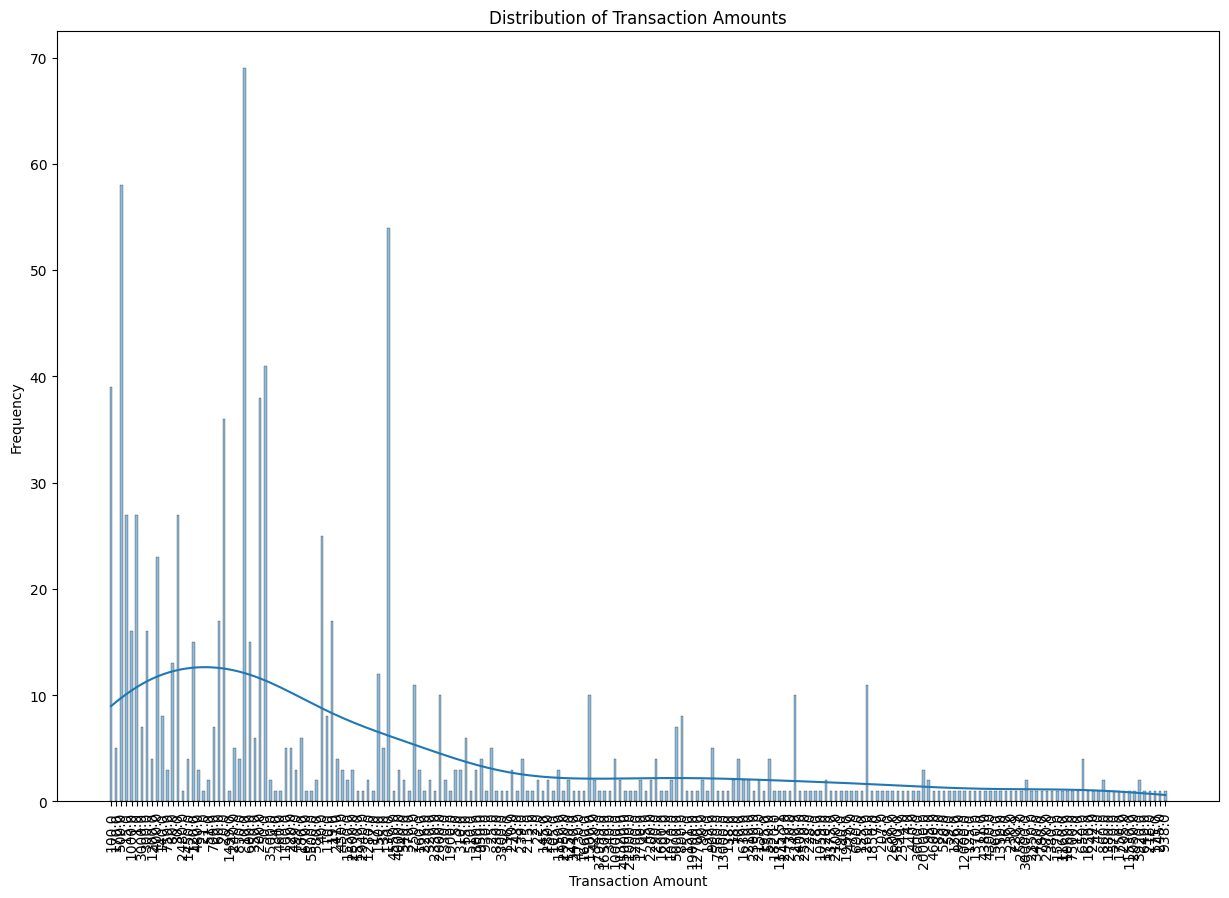

In [10]:
plt.figure(figsize=(15, 10))
sns.histplot(df['amount'], bins=50, kde=True,shrink=0.5)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

In [23]:
df.dtypes

type                     object
mode                     object
amount                  float64
currentBalance           object
transactionTimestamp     object
valueDate                object
txnId                    object
narration                object
reference                object
dtype: object

In [24]:
df['amount'] = df['amount'].astype(float)

In [27]:
df['amount'].max()

45000.0

In [28]:
df['amount'].min()

1.0

In [29]:
df['amount'].mean()

855.4928020304569

In [30]:
small_amt=500
large_amt=5000

In [31]:
df.dtypes

type                     object
mode                     object
amount                  float64
currentBalance           object
transactionTimestamp     object
valueDate                object
txnId                    object
narration                object
reference                object
dtype: object

In [32]:
small_tr=df[df['amount'] < small_amt]
large_tr=df[df['amount'] > large_amt]

In [33]:
small_tr

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference
0,DEBIT,CARD,100.0,2180.80,2023-06-27T09:40:19+05:30,2023-06-27,S39488701,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
1,DEBIT,CARD,170.0,2010.80,2023-06-28T09:51:57+05:30,2023-06-28,S76862822,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
3,CREDIT,OTHERS,15.0,1525.80,2023-08-06T11:10:38+05:30,2023-07-31,S66463256,51888100006461IntPd01-05-2023 to 31-07-2023,NA
5,DEBIT,UPI,1.0,524.80,2023-08-22T08:05:06+05:30,2023-08-22,S82724622,UPI/323444770475/080506/UPI/8795417446ybl/Paym,NA
7,CREDIT,UPI,300.0,3824.80,2023-08-22T12:20:04+05:30,2023-08-22,S92051775,UPI/323457106254/122004/UPI/9264998949barodamp,NA
...,...,...,...,...,...,...,...,...,...
979,DEBIT,UPI,245.0,103.41,2024-05-29T17:12:19+05:30,2024-05-29,S66551053,UPI/451629965942/171219/UPI/9910619719ibl/Paym,NA
980,DEBIT,UPI,80.0,23.41,2024-05-29T17:57:40+05:30,2024-05-29,S68913329,UPI/415067358040/175740/UPI/paytmqr1reyim9t8ap,NA
982,DEBIT,UPI,60.0,901.41,2024-05-30T09:58:24+05:30,2024-05-30,S94085910,UPI/451708846336/095823/UPI/Q936188905ybl/Paym,NA
983,DEBIT,UPI,130.0,771.41,2024-05-30T13:30:30+05:30,2024-05-30,S4676116,UPI/451747322898/133029/UPI/Q601737327ybl/Paym,NA


In [34]:
large_tr

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference
78,CREDIT,OTHERS,5500.0,6339.80,2023-09-14T21:14:51+05:30,2023-09-14,S38051220,IMPS/P2A/325721171918/PHONEPEPRIVATEL/IMPSAXB9111,NA
275,CREDIT,UPI,37999.0,43892.80,2023-11-14T18:31:11+05:30,2023-11-14,S65593249,UPI/331812106847/183112/UPI/311999sshuklaaxl/P,NA
277,DEBIT,UPI,16500.0,27391.80,2023-11-14T18:49:41+05:30,2023-11-14,S66498670,UPI/331814821452/184941/UPI/7007674186paytm/UP,NA
285,DEBIT,UPI,10000.0,12970.80,2023-11-15T17:48:21+05:30,2023-11-15,S7201813,UPI/368589163186/174821/UPI/8905552611ikwik/UP,NA
291,CREDIT,CASH,45000.0,58180.80,2023-11-16T15:51:14+05:30,2023-11-16,00707977,BY CASH,NA
295,DEBIT,UPI,21000.0,35400.80,2023-11-17T16:34:54+05:30,2023-11-17,S82212459,UPI/332126038252/163454/UPI/msjsrfashioneazypa,NA
296,DEBIT,UPI,5200.0,30200.80,2023-11-17T18:32:29+05:30,2023-11-17,S88311015,UPI/368715646136/183228/UPI/971167234646axl/UP,NA
332,DEBIT,UPI,19000.0,16625.80,2023-11-29T16:15:33+05:30,2023-11-29,S50294642,UPI/333335900423/161532/UPI/mrking25icici/UPI,NA
333,DEBIT,UPI,12700.0,3925.80,2023-11-29T17:09:47+05:30,2023-11-29,S52850056,UPI/369921004440/170947/UPI/9310460780ibl/UPI,NA
351,CREDIT,OTHERS,7560.0,13925.80,2023-12-05T07:08:30+05:30,2023-12-05,S85798345,NEFT-AXNPN33391170193-PHONEPE PRIVATE LIMITED-...,922020004688715


In [35]:
print("No of small transactions are: ",len(small_tr))
print("No of large transactions are: ",len(large_tr))

No of small transactions are:  687
No of large transactions are:  22


In [37]:
credit_tr=df[df['type']=="CREDIT"]
debit_tr=df[df['type']=="DEBIT"]

In [38]:
credit_tr

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference
3,CREDIT,OTHERS,15.0,1525.80,2023-08-06T11:10:38+05:30,2023-07-31,S66463256,51888100006461IntPd01-05-2023 to 31-07-2023,NA
6,CREDIT,UPI,3000.0,3524.80,2023-08-22T11:49:13+05:30,2023-08-22,S90667553,UPI/323441197152/114914/UPI/8795417446ybl/Paym,NA
7,CREDIT,UPI,300.0,3824.80,2023-08-22T12:20:04+05:30,2023-08-22,S92051775,UPI/323457106254/122004/UPI/9264998949barodamp,NA
9,CREDIT,UPI,400.0,3024.80,2023-08-23T10:51:21+05:30,2023-08-23,S25232032,UPI/323567840697/105122/UPI/kimoroybl/Payment,NA
10,CREDIT,UPI,500.0,3524.80,2023-08-24T11:32:18+05:30,2023-08-24,S65206796,UPI/323602109737/113218/UPI/9701028466ibl/Paym,NA
...,...,...,...,...,...,...,...,...,...
959,CREDIT,OTHERS,1000.0,1690.31,2024-05-25T22:54:11+05:30,2024-05-25,S85499451,IMPS/P2A/414622757146/ONE97COMMUNICAT/IMPSAXB9199,NA
972,CREDIT,OTHERS,210.0,529.31,2024-05-28T05:41:08+05:30,2024-05-28,S84053875,NEFT-AXNPN14927376982-PHONEPE PRIVATE LIMITED-...,922020004688715
975,CREDIT,OTHERS,150.0,419.31,2024-05-29T06:03:44+05:30,2024-05-29,S38920101,NEFT-AXNPN15036609374-PHONEPE PRIVATE LIMITED-...,922020004688715
978,CREDIT,UPI,300.0,348.41,2024-05-29T17:10:42+05:30,2024-05-29,S66468359,UPI/415061496542/171043/UPI/7786043828ibl/Paym,NA


In [39]:
print("No of credit transactions are: ",len(credit_tr))
print("No of debit transactions are: ",len(debit_tr))

No of credit transactions are:  290
No of debit transactions are:  695


### Balance Analysis

In [40]:
balance = df[['transactionTimestamp', 'currentBalance']].drop_duplicates().sort_values('transactionTimestamp')

In [91]:
balance['currentBalance'] = balance['currentBalance'].astype(float)

In [92]:
balance['transactionTimestamp']=pd.to_datetime(balance['transactionTimestamp'])

In [93]:
balance

,transactionTimestamp,currentBalance,month
0,2023-06-27 09:40:19+05:30,2180.80,2023-06
1,2023-06-28 09:51:57+05:30,2010.80,2023-06
2,2023-07-26 10:04:00+05:30,1510.80,2023-07
3,2023-08-06 11:10:38+05:30,1525.80,2023-08
4,2023-08-07 17:13:13+05:30,525.80,2023-08
...,...,...,...
980,2024-05-29 17:57:40+05:30,23.41,2024-05
981,2024-05-30 05:07:05+05:30,961.41,2024-05
982,2024-05-30 09:58:24+05:30,901.41,2024-05
983,2024-05-30 13:30:30+05:30,771.41,2024-05


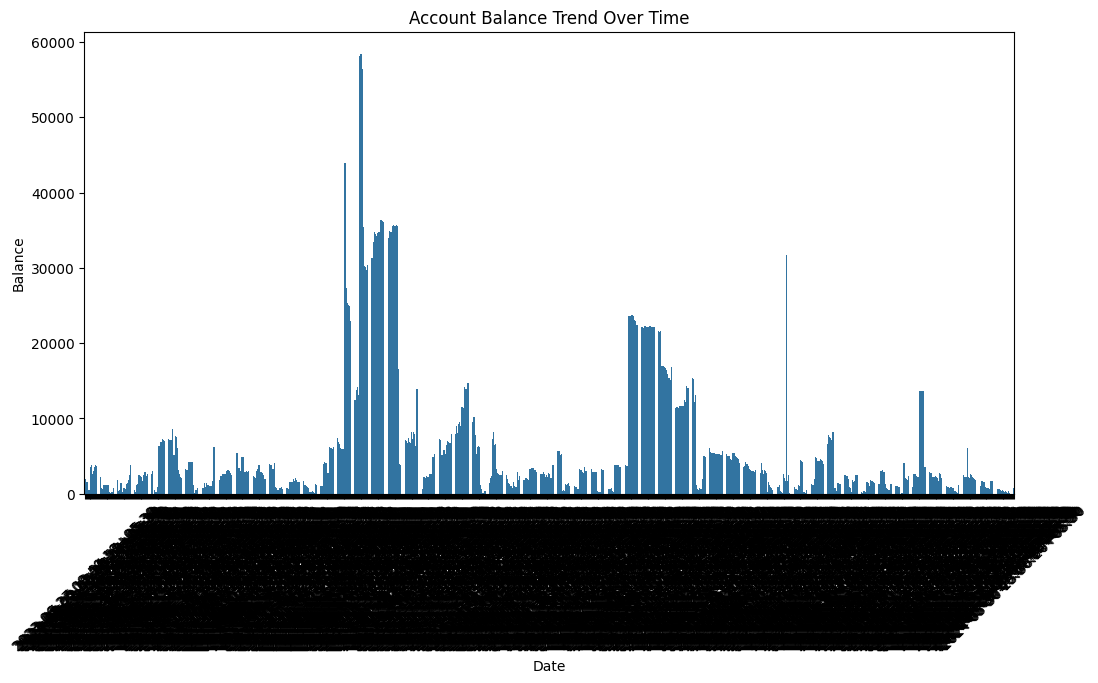

In [94]:
plt.figure(figsize=(12, 6))
sns.barplot(x='transactionTimestamp', y='currentBalance', data=balance)
plt.title('Account Balance Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Balance')
plt.xticks(rotation=45)
plt.show()

C:\Users\prati\AppData\Local\Temp\ipykernel_9436\3222282127.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  balance['month'] = balance['transactionTimestamp'].dt.to_period('M')


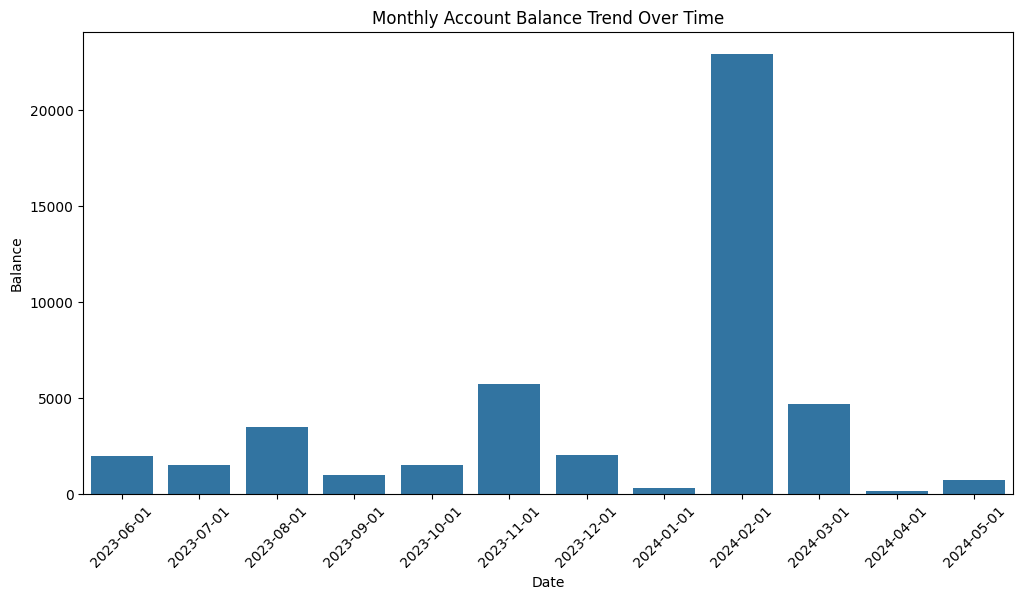

In [ ]:

balance['month'] = balance['transactionTimestamp'].dt.to_period('M')
monthly_balance_trend = balance.groupby('month')['currentBalance'].last().reset_index()


monthly_balance_trend['month'] = monthly_balance_trend['month'].dt.to_timestamp()


plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='currentBalance', data=monthly_balance_trend)
plt.title('Monthly Account Balance Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Balance')
plt.xticks(rotation=45)
plt.show()


In [97]:
balance['balance_diff'] = balance['currentBalance'].diff().abs()
changes = balance[balance['balance_diff'] > 10000]  

#considering 10000 as significant change

In [98]:
changes

,transactionTimestamp,currentBalance,month,balance_diff
275,2023-11-14 18:31:11+05:30,43892.80,2023-11,37999.0
277,2023-11-14 18:49:41+05:30,27391.80,2023-11,16500.0
291,2023-11-16 15:51:14+05:30,58180.80,2023-11,45000.0
295,2023-11-17 16:34:54+05:30,35400.80,2023-11,21000.0
332,2023-11-29 16:15:33+05:30,16625.80,2023-11,19000.0
333,2023-11-29 17:09:47+05:30,3925.80,2023-11,12700.0
353,2023-12-05 15:50:06+05:30,865.80,2023-12,13000.0
570,2024-02-24 18:55:15+05:30,23483.91,2024-02,20000.0
572,2024-02-25 11:08:34+05:30,3683.91,2024-02,20000.0
576,2024-02-25 20:08:58+05:30,23664.91,2024-02,20000.0


### Spending Patterns

In [99]:
df['narration']

0                  PRCR/MS NEHA FILLING STATIO/FARRUKHAB
1                  PRCR/MS NEHA FILLING STATIO/FARRUKHAB
2                  PRCR/MS NEHA FILLING STATIO/FARRUKHAB
3            51888100006461IntPd01-05-2023 to 31-07-2023
4                 ATM/CASH/321917012791/XXXXXXXXXXXX8896
                             ...                        
980       UPI/415067358040/175740/UPI/paytmqr1reyim9t8ap
981    NEFT-AXNPN15145877034-PHONEPE PRIVATE LIMITED-...
982       UPI/451708846336/095823/UPI/Q936188905ybl/Paym
983       UPI/451747322898/133029/UPI/Q601737327ybl/Paym
984       UPI/451711506710/133820/UPI/Q596679282ybl/Paym
Name: narration, Length: 985, dtype: object

In [100]:
categories = {                                              #
    'fuel': ['FILLING', 'FUEL'],
    'ecommerce': ['Ecommerce', 'Amazon', 'Flipkart'],
    'food': ['Restaurant', 'Cafe', 'Food'],
    'bank transfer':['NEFT','IMPS'],
    'shopping': ['Shopping', 'Mall'],
    'atm': ['ATM'],
    'upi': ['UPI'],
    'cash': ['By Cash']
}

In [101]:
df['category']='others'     #create a category column in df initialised with 'others'

In [102]:
for category, keywords in categories.items():
    df.loc[df['narration'].str.contains('|'.join(keywords), case=False, na=False), 'category'] = category   
#case is false meaning not case sensitive
#na is false implies NaN values are ignored

In [103]:
df

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference,category
0,DEBIT,CARD,100.0,2180.80,2023-06-27T09:40:19+05:30,2023-06-27,S39488701,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA,fuel
1,DEBIT,CARD,170.0,2010.80,2023-06-28T09:51:57+05:30,2023-06-28,S76862822,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA,fuel
2,DEBIT,CARD,500.0,1510.80,2023-07-26T10:04:00+05:30,2023-07-26,S31451661,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA,fuel
3,CREDIT,OTHERS,15.0,1525.80,2023-08-06T11:10:38+05:30,2023-07-31,S66463256,51888100006461IntPd01-05-2023 to 31-07-2023,NA,others
4,DEBIT,ATM,1000.0,525.80,2023-08-07T17:13:13+05:30,2023-08-07,S18475743,ATM/CASH/321917012791/XXXXXXXXXXXX8896,NA,atm
...,...,...,...,...,...,...,...,...,...,...
980,DEBIT,UPI,80.0,23.41,2024-05-29T17:57:40+05:30,2024-05-29,S68913329,UPI/415067358040/175740/UPI/paytmqr1reyim9t8ap,NA,upi
981,CREDIT,OTHERS,938.0,961.41,2024-05-30T05:07:05+05:30,2024-05-30,S87517914,NEFT-AXNPN15145877034-PHONEPE PRIVATE LIMITED-...,922020004688715,bank transfer
982,DEBIT,UPI,60.0,901.41,2024-05-30T09:58:24+05:30,2024-05-30,S94085910,UPI/451708846336/095823/UPI/Q936188905ybl/Paym,NA,upi
983,DEBIT,UPI,130.0,771.41,2024-05-30T13:30:30+05:30,2024-05-30,S4676116,UPI/451747322898/133029/UPI/Q601737327ybl/Paym,NA,upi


In [104]:
expense_cat=df[df['type']=='DEBIT']['category'].value_counts()

In [105]:
expense_cat

category
upi     688
fuel      4
atm       3
Name: count, dtype: int64

In [106]:
expense_amt=df[df['type'] == 'DEBIT'].groupby('category')['amount'].sum()

In [107]:
expense_amt

category
atm      13500.0
fuel       830.0
upi     407759.9
Name: amount, dtype: float64

### Income Analysis

In [108]:
df[df['type']=='CREDIT']

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference,category
3,CREDIT,OTHERS,15.0,1525.80,2023-08-06T11:10:38+05:30,2023-07-31,S66463256,51888100006461IntPd01-05-2023 to 31-07-2023,NA,others
6,CREDIT,UPI,3000.0,3524.80,2023-08-22T11:49:13+05:30,2023-08-22,S90667553,UPI/323441197152/114914/UPI/8795417446ybl/Paym,NA,upi
7,CREDIT,UPI,300.0,3824.80,2023-08-22T12:20:04+05:30,2023-08-22,S92051775,UPI/323457106254/122004/UPI/9264998949barodamp,NA,upi
9,CREDIT,UPI,400.0,3024.80,2023-08-23T10:51:21+05:30,2023-08-23,S25232032,UPI/323567840697/105122/UPI/kimoroybl/Payment,NA,upi
10,CREDIT,UPI,500.0,3524.80,2023-08-24T11:32:18+05:30,2023-08-24,S65206796,UPI/323602109737/113218/UPI/9701028466ibl/Paym,NA,upi
...,...,...,...,...,...,...,...,...,...,...
959,CREDIT,OTHERS,1000.0,1690.31,2024-05-25T22:54:11+05:30,2024-05-25,S85499451,IMPS/P2A/414622757146/ONE97COMMUNICAT/IMPSAXB9199,NA,bank transfer
972,CREDIT,OTHERS,210.0,529.31,2024-05-28T05:41:08+05:30,2024-05-28,S84053875,NEFT-AXNPN14927376982-PHONEPE PRIVATE LIMITED-...,922020004688715,bank transfer
975,CREDIT,OTHERS,150.0,419.31,2024-05-29T06:03:44+05:30,2024-05-29,S38920101,NEFT-AXNPN15036609374-PHONEPE PRIVATE LIMITED-...,922020004688715,bank transfer
978,CREDIT,UPI,300.0,348.41,2024-05-29T17:10:42+05:30,2024-05-29,S66468359,UPI/415061496542/171043/UPI/7786043828ibl/Paym,NA,upi


In [109]:
income_sources = df[df['type'] == 'CREDIT']['category'].value_counts()

In [110]:
income_sources

category
bank transfer    184
upi              101
others             4
cash               1
Name: count, dtype: int64

In [111]:
df[df['category'] == 'others']

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference,category
3,CREDIT,OTHERS,15.0,1525.80,2023-08-06T11:10:38+05:30,2023-07-31,S66463256,51888100006461IntPd01-05-2023 to 31-07-2023,NA,others
251,CREDIT,OTHERS,15.0,1070.80,2023-11-08T17:41:05+05:30,2023-10-31,S90687471,51888100006461IntPd01-08-2023 to 31-10-2023,NA,others
511,CREDIT,OTHERS,58.0,1269.81,2024-02-03T09:29:49+05:30,2024-01-31,S68777922,51888100006461IntPd01-11-2023 to 31-01-2024,NA,others
815,CREDIT,OTHERS,47.0,1643.21,2024-05-02T05:25:12+05:30,2024-04-30,S78744785,51888100006461IntPd01-02-2024 to 30-04-2024,NA,others


In [114]:
df['transactionTimestamp'] = pd.to_datetime(df['transactionTimestamp'])

In [115]:
timing = df[df['type'] == 'CREDIT'].groupby(df['transactionTimestamp'].dt.to_period('M'))['amount'].sum()

C:\Users\prati\AppData\Local\Temp\ipykernel_9436\1591546610.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  timing = df[df['type'] == 'CREDIT'].groupby(df['transactionTimestamp'].dt.to_period('M'))['amount'].sum()


In [117]:
timing

transactionTimestamp
2023-08     12679.00
2023-09     22605.00
2023-10     21472.00
2023-11    115737.00
2023-12     37953.51
2024-01     22127.00
2024-02     63782.00
2024-03     25420.00
2024-04     58660.00
2024-05     40135.00
Freq: M, Name: amount, dtype: float64

### Alert generation

In [120]:
unusual_tr = df[df['amount'] > 10000]


low_balance = balance[balance['currentBalance'] < 500]  
high_exp_periods = df[df['type'] == 'DEBIT'].groupby(df['transactionTimestamp'].dt.to_period('M'))['amount'].sum()
high_exp_alerts = high_exp_periods[high_exp_periods > 10000]  

C:\Users\prati\AppData\Local\Temp\ipykernel_9436\3735055598.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  high_exp_periods = df[df['type'] == 'DEBIT'].groupby(df['transactionTimestamp'].dt.to_period('M'))['amount'].sum()


In [121]:
high_exp_periods

transactionTimestamp
2023-06       270.0
2023-07       500.0
2023-08     10689.0
2023-09     25117.0
2023-10     20965.0
2023-11    111499.0
2023-12     41627.8
2024-01     23855.7
2024-02     41207.9
2024-03     43641.8
2024-04     63154.9
2024-05     39561.8
Freq: M, Name: amount, dtype: float64